In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

# To convert Julian date to standard date
import datetime
from datetime import datetime
from datetime import time

import warnings
warnings.filterwarnings('ignore')

X1 = np.random.normal(loc= -4, size= (100,2))
X2 = np.random.normal(loc= 4, size= (100,2))
toy_data = np.concatenate((X1,X2))


X1 = np.random.normal(loc= (-4,4), size= (100,2))
X2 = np.random.normal(loc= (4, -4), size= (100,2))
toy_data2 = np.concatenate((X1,X2))

In [16]:
X = np.concatenate((toy_data, toy_data2))
y = np.concatenate((np.zeros((200,1)),np.ones((200,1))))
X.shape, y.shape

((400, 2), (400, 1))

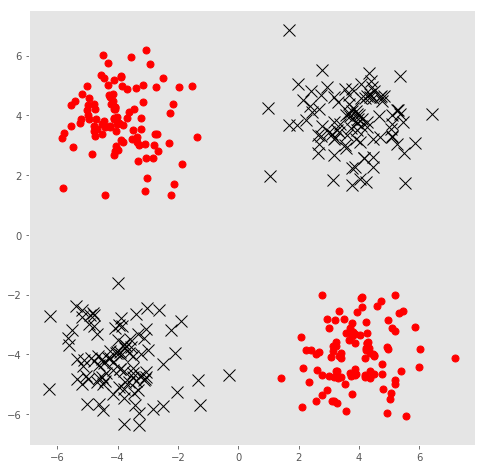

In [17]:
fig, ax = plt.subplots();fig.set_size_inches(8,8); 
plt.plot(X[:200,0], X[:200,1],'kx', markersize=12)
plt.plot(X[200:,0], X[200:,1],'ro', markersize=7)
plt.grid(); plt.show();

In [18]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    plt.plot(X[:200,0], X[:200,1],'kx', markersize=12)
    plt.plot(X[200:,0], X[200:,1],'ro', markersize=7)
    plt.grid(); plt.show();

In [19]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluation

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# Scaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply ML
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
# Learn best parameters
knn.fit(X_train, y_train)
# Prediction
y_pred = knn.predict(X_test)
# Evaluation
accuracy_score(y_test, y_pred)

1.0

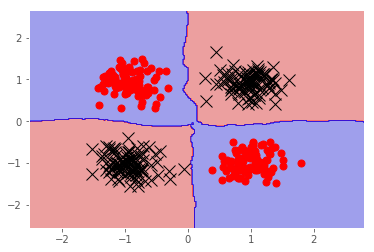

In [20]:
plot_decision_regions(scaler.transform(X), y, classifier=knn)

In [21]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(10, 10), random_state=1)


clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
# Evaluation
accuracy_score(y_test, y_pred)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))



1.0


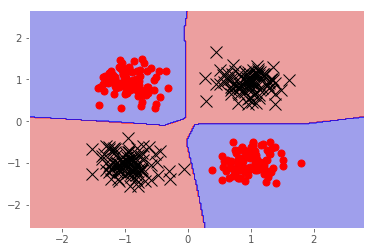

In [22]:
plot_decision_regions(scaler.transform(X), y, classifier=clf)

1.0


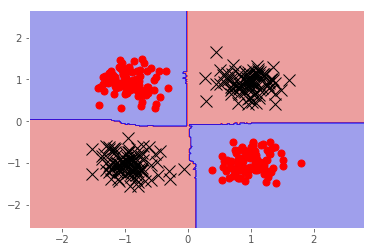

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(accuracy_score(y_test, y_pred))


plot_decision_regions(scaler.transform(X), y, classifier=forest)